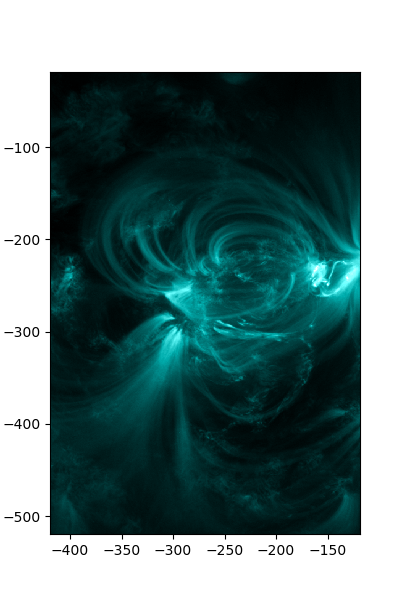

In [2]:
from InteractiveLoopTracer import *
from WideLoop import *

%matplotlib widget

lines = [94, 131, 171, 193, 211, 304, 335]
images = os.listdir('../sunishot/images')

tmp = [sunpy.map.Map(f'../sunishot/images/{filename}') for filename in images if filename.find(f'{lines[2]}A') != -1]
aia_map = sunpy.map.Map(tmp, sequence=True)
x_grid = np.linspace(aia_map[0].bottom_left_coord.Tx.value, aia_map[0].top_right_coord.Tx.value, aia_map[0].data.shape[1])
y_grid = np.linspace(aia_map[0].bottom_left_coord.Ty.value, aia_map[0].top_right_coord.Ty.value, aia_map[0].data.shape[0])

tracer = WideLoop(aia_map.data[:,:,50], x_grid, y_grid)
tracer.show()



In [2]:
aia_map.data

array([[[214.54162107, 222.04229906, 219.54248147, ..., 212.04007557,
         217.04134638, 219.54116397],
        [221.04288232, 218.54163218, 210.54073963, ..., 203.03837425,
         210.54010789, 198.03713196],
        [230.54472568, 217.54144164, 243.54712637, ..., 215.04064268,
         210.04001262, 197.03694443],
        ...,
        [186.036091  , 171.03258171, 183.53551412, ..., 195.53695648,
         186.03543975, 208.03900731],
        [179.03473274, 174.53324858, 167.03232075, ..., 199.03761811,
         208.53972682, 208.53910108],
        [169.53288938, 172.03277224, 156.53028861, ..., 198.53752359,
         198.53782145, 198.53722573]],

       [[202.0391956 , 225.04287067, 225.04354593, ..., 197.03724004,
         202.03848833, 204.53835094],
        [220.5427853 , 218.04153691, 213.04122348, ..., 213.04026461,
         210.54010789, 213.03994499],
        [227.04404655, 232.54429969, 232.54499746, ..., 219.54149334,
         212.04039369, 217.04069513],
        ...,
